<a href="https://colab.research.google.com/github/Madhavmurari/ML-Projects/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**

Credit card fraud is a major financial crime that affects millions of people worldwide. Detecting fraudulent transactions is crucial for minimizing losses and protecting customers. In this project, we will use machine learning techniques to identify potentially fraudulent credit card transactions using a real-world dataset.

## **Objective**

The main objective of this project is to build and evaluate models that can distinguish between legitimate and fraudulent credit card transactions. We will perform exploratory data analysis, preprocess the data, and experiment with various algorithms to achieve accurate fraud detection.

## **Dataset**

The dataset used in this project contains transactions made by European cardholders in September 2013. It presents transactions that occurred over two days and contains 284,807 records, with only 492 cases of fraud (highly imbalanced dataset). Most features are the result of a PCA transformation, except for 'Time', 'Amount', and 'Class' (where 'Class' is the target variable: 1 for fraud, 0 for normal).

Dataset to downloaded from the link
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Let's start by importing the necessary libraries.

#**Importing Libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest,VotingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import MiniBatchKMeans

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

from scipy.spatial.distance import euclidean
from imblearn.over_sampling import SMOTE
import random
import tensorflow as tf

from tensorflow.keras.utils import plot_model
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')



# **Exploratory Data Analysis**

In [86]:
df=pd.read_csv('/content/creditcard.csv')

In [87]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
df.shape

(284807, 31)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


- **Shape:** The dataset contains **284,807 rows** and **31 columns**.
- **Columns:** There are 30 features of type `float64` and 1 target variable (`Class`) of type `int64`.
- **Features:** Most columns (`V1` to `V28`) are anonymized principal components from a PCA transformation, plus `Time`, `Amount`, and `Class`.
- **Completeness:** There are **no missing values** in any column; all 284,807 entries are non-null.
- **Memory Usage:** The DataFrame uses approximately 67.4 MB of memory.
- **Target:** The `Class` column is the label — `0` for normal transactions and `1` for fraudulent transactions.

**Summary:**  
The dataset is clean, with no missing values or type inconsistencies. This completeness allows us to proceed directly with data exploration and preprocessing without worrying about imputation or type conversion. Given the anonymized nature of most features, domain-specific interpretations are limited, but standard statistical and machine learning techniques can be effectively applied.

In [90]:
#number of Dublicate Value
df.duplicated().sum()

np.int64(1081)

There is 1081 dublicate value. We we handle it in preprocessing.

In [91]:
df[df['Class']==1].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.81,47835.37,406.00,41241.50,75568.50,128483.00,170348.00
V1,492.0,-4.77,6.78,-30.55,-6.04,-2.34,-0.42,2.13
V2,492.0,3.62,4.29,-8.40,1.19,2.72,4.97,22.06
V3,492.0,-7.03,7.11,-31.10,-8.64,-5.08,-2.28,2.25
V4,492.0,4.54,2.87,-1.31,2.37,4.18,6.35,12.11
V5,492.0,-3.15,5.37,-22.11,-4.79,-1.52,0.21,11.10
V6,492.0,-1.40,1.86,-6.41,-2.50,-1.42,-0.41,6.47
V7,492.0,-5.57,7.21,-43.56,-7.97,-3.03,-0.95,5.80
V8,492.0,0.57,6.80,-41.04,-0.20,0.62,1.76,20.01
V9,492.0,-2.58,2.50,-13.43,-3.87,-2.21,-0.79,3.35



- **Sample Size:** There are 492 fraudulent transactions in the dataset.
- **Transaction Amount:**
  - The average amount for frauds is \$122.21.
  - The median is much lower at \$9.25, indicating most fraudulent transactions are for small amounts.
  - There are a few very large fraudulent transactions, with the maximum reaching \$2,125.87.
- **Time:** Fraudulent transactions occur throughout the entire time span of the data; there is no strong clustering at a specific period.
- **Feature Patterns:**
  - Most PCA components (V1, V3, V5, V7, V9, V10, V12, V14, V16, V17, V18) have negative means, suggesting specific latent patterns associated with fraud.
  - A few components (V2, V4, V11, V19, V20, V21) have positive means, which may also be characteristic of fraud cases.
  - Many features show a large standard deviation and wide range (e.g., V7, V8, V21), reflecting high variability among fraud transactions.
- **Class:** All rows in this summary have `Class = 1` (fraud), as expected.

**Summary:**  
Fraudulent transactions are generally for low amounts but can occasionally be very large. The features derived from PCA show distinct statistical patterns (often negative means) compared to what is observed in typical, non-fraudulent transactions. These feature distributions and their variability can be crucial for machine learning models to distinguish fraud from normal activity.

In [92]:
df.groupby('Class')['Amount'].describe().round(2).T

Class,0,1
count,284315.00,492.00
mean,88.29,122.21
std,250.11,256.68
min,0.00,0.00
25%,5.65,1.00
50%,22.00,9.25
75%,77.05,105.89
max,25691.16,2125.87


**Key Observations:**
- **Fraudulent transactions have a higher average amount (\$122.21) than legitimate ones (\$88.29).**
- **The median and lower quartile for frauds are smaller,** showing that most frauds are for small amounts, but the upper quartile and mean are much higher, so a minority of frauds involve large sums.
- **Maximum transaction amount for legitimate transactions is much greater (\$25,691.16),** but fraudulent transactions can still reach very high values (\$2,125.87).
- **Overall:** Fraudulent transactions are typically small, but the presence of large-amount frauds increases the mean. This reflects a pattern where fraudsters frequently attempt many small transactions, but occasionally attempt high-value ones as well.

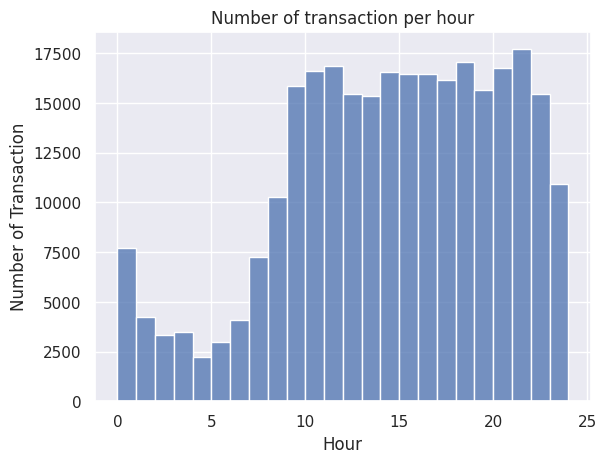

In [93]:
df['Hour']=(df['Time']/3600)%24
sns.histplot(data=df, x='Hour',bins=24,kde=False)
plt.xlabel('Hour')
plt.ylabel('Number of Transaction')
plt.title('Number of transaction per hour')
plt.show()

###Hourly Transaction Distribution

- **Peak Hours (9 AM – 10 PM):**
  - Majority of transactions occur during the day and early evening, aligning with normal business and activity hours.

- **Low Activity (12 AM – 6 AM):**
  - Noticeably fewer transactions, likely due to users being inactive during nighttime.

- **Insights:**
  - Transactions outside typical hours (e.g., 2–5 AM) may indicate unusual behavior and could be valuable in detecting fraud.

In [94]:
df.drop('Hour',axis=1,inplace=True) #Deleting hour Column

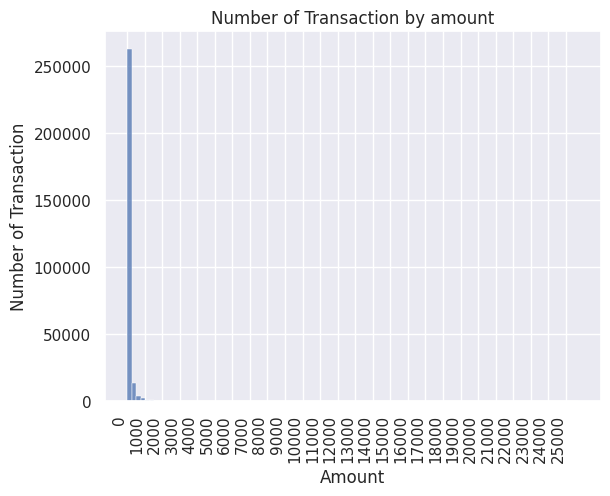

In [95]:
sns.histplot(data=df,x='Amount',bins=100,kde=False)
plt.xticks(range(0,26000,1000),rotation=90,ha='right')
plt.title('Number of Transaction by amount')
plt.xlabel('Amount')
plt.ylabel('Number of Transaction')
plt.show()

### Analysis of Transaction Amount Distribution

**Key Insights:**
- The vast majority of transactions are concentrated at low amounts, as shown by the tall spike near the left end of the x-axis.
- As the transaction amount increases, the frequency of transactions drops sharply.
- Transactions above \$2,000 are extremely rare, and almost all activity occurs at much lower values.
- This distribution is highly right-skewed, which is typical in financial datasets: most purchases are small, with only a few very large ones.

**Conclusion:**
- The distribution is highly right-skewed (positively skewed), meaning most transactions are for low amounts, with a long tail of higher-value transactions.
- This pattern is typical in real-world financial data, where small purchases are much more frequent than large ones.

In [96]:
#Only V column for histogram purpose
V=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

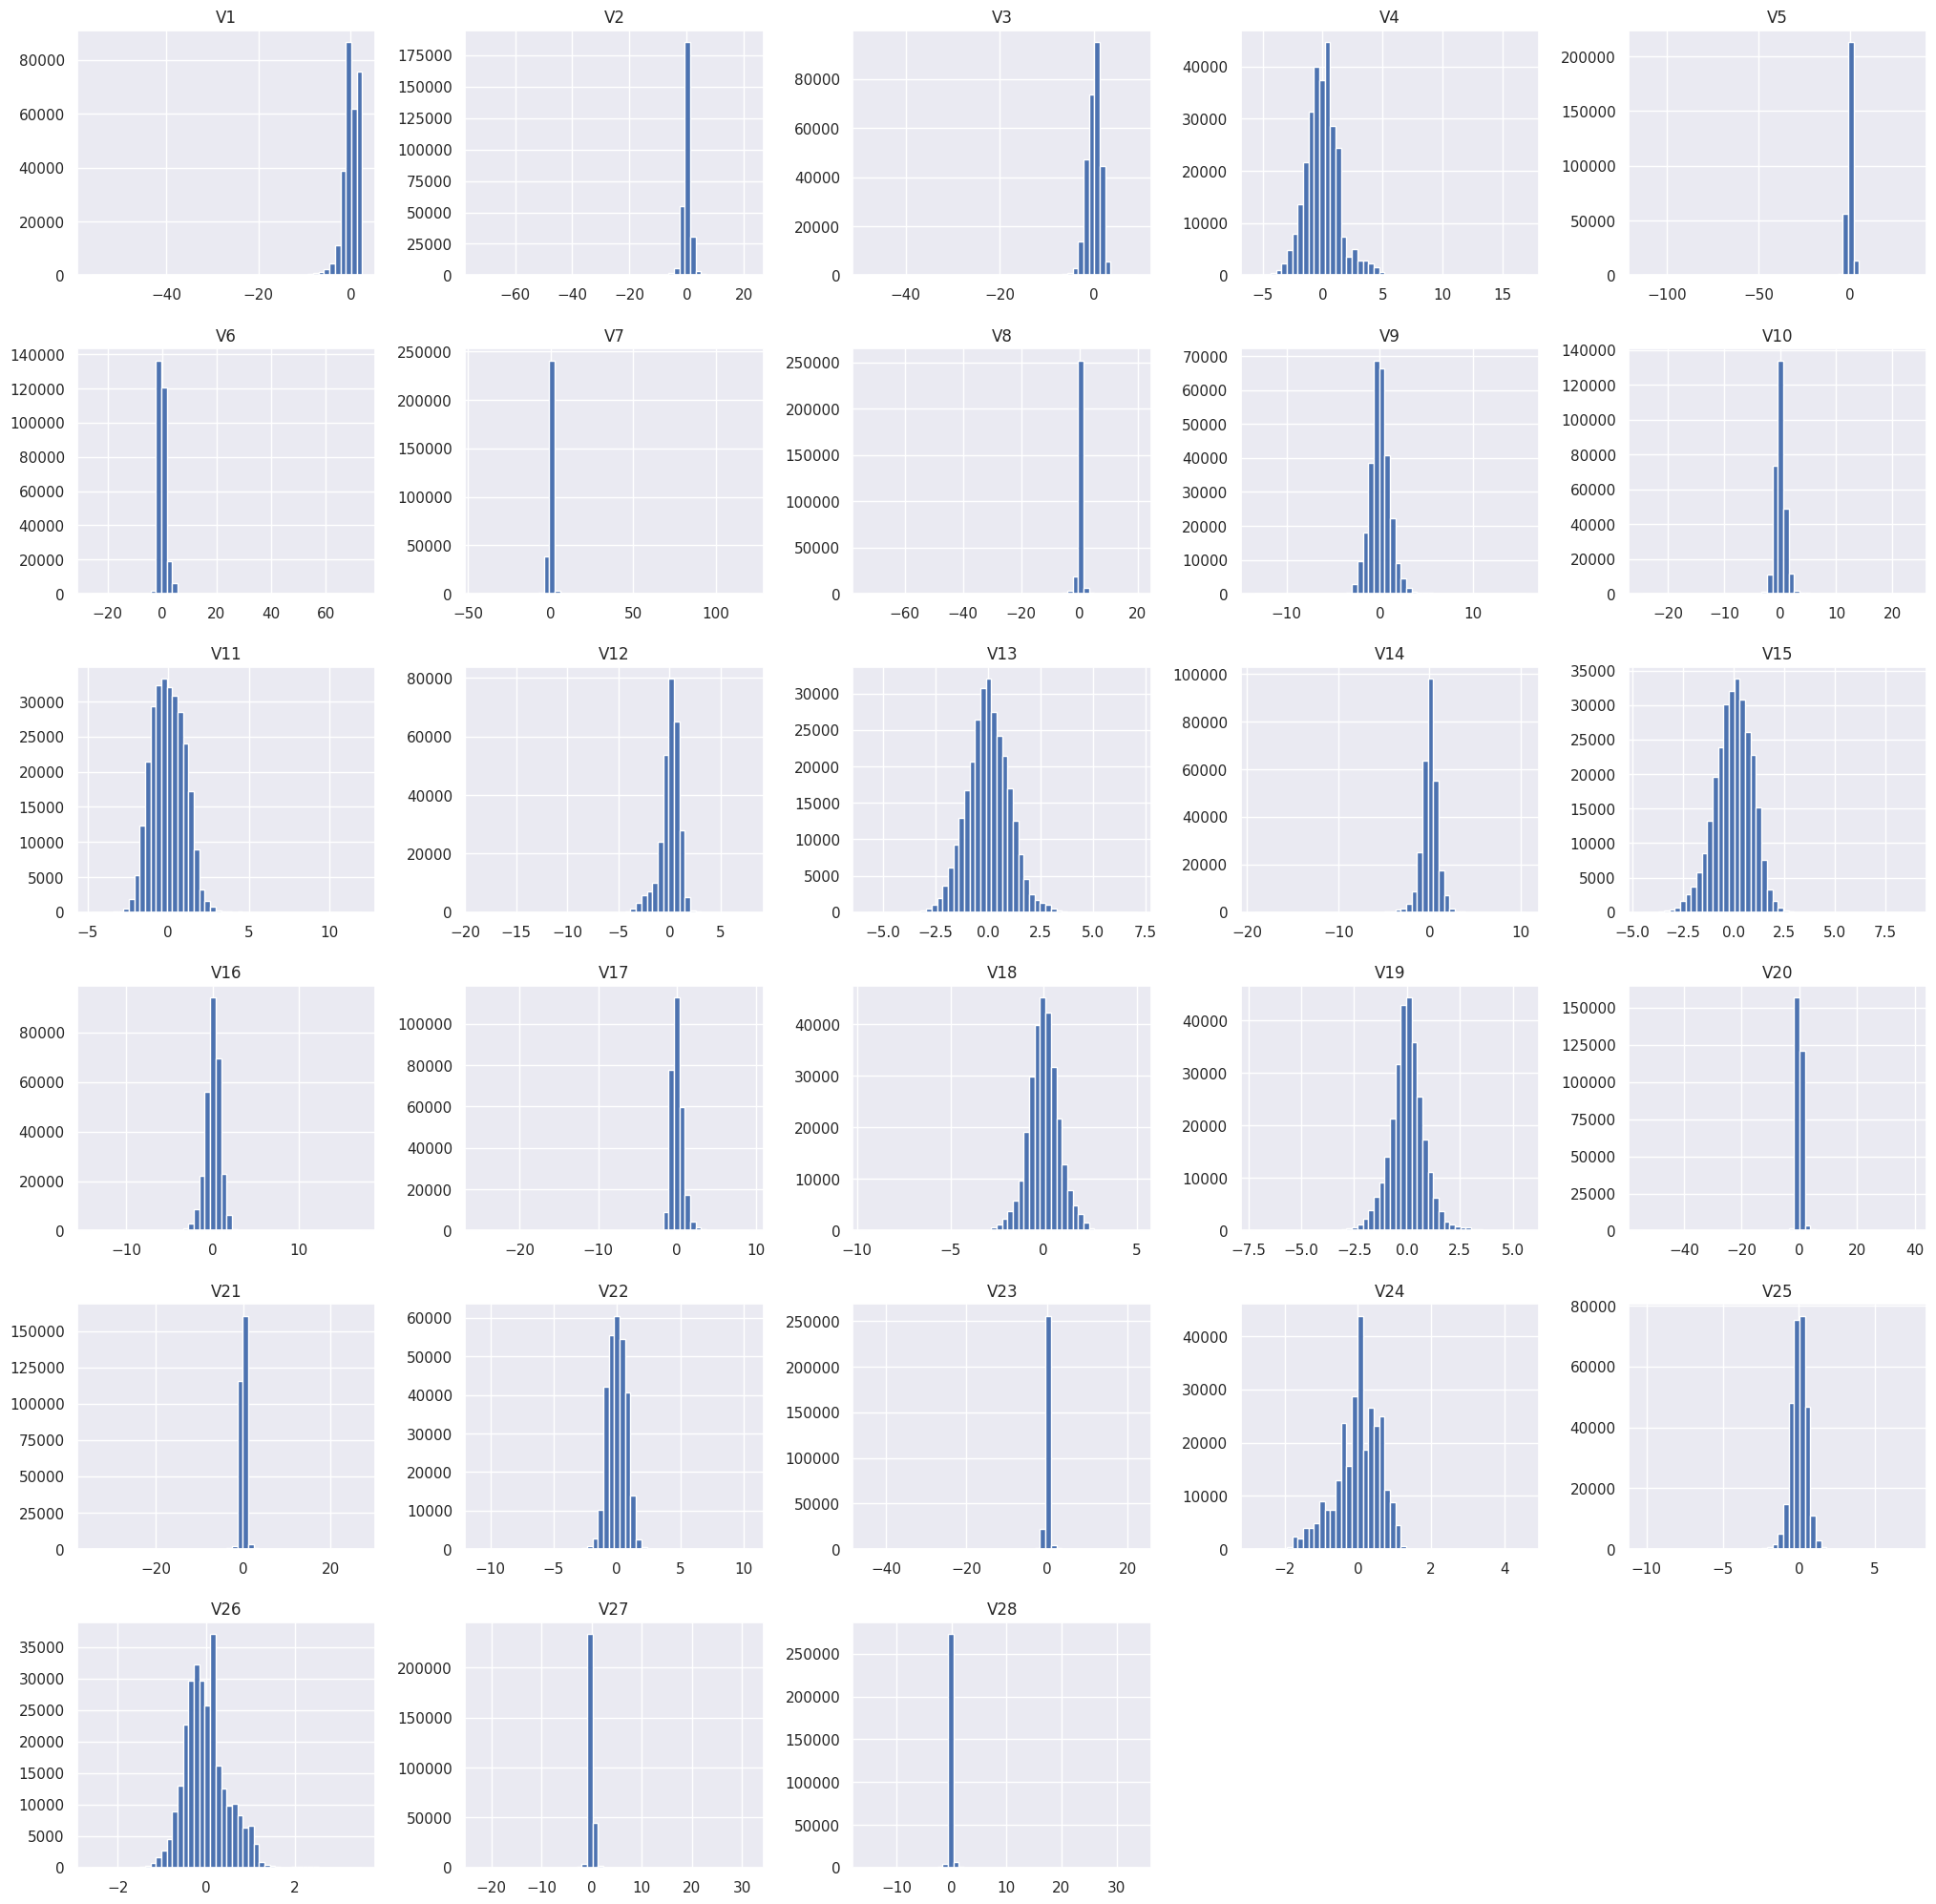

In [97]:
df[V].hist(figsize=(25,25),bins=50)  # Histogram for each V column
plt.show()

### Histograms of PCA Features (V1–V28)

**Key Observations:**
- Most features display distributions that are approximately symmetric and centered around zero, resembling a normal (Gaussian) distribution. This is expected as these features were derived using Principal Component Analysis (PCA).
- Some features (e.g., V3, V4, V10, V12, V14, V17) show a slight skew or outliers, but overall, the majority of values are concentrated near the center.
- The spread (variance) and range differ between features: some (like V7, V20, V21, V22) have wider ranges, while others are more tightly clustered.
- There are no visible missing values or major anomalies in these distributions.

**Conclusion:**
- The PCA-transformed features are well-behaved and mostly follow Gaussian-like distributions, which is suitable for many machine learning algorithms.
- Features with pronounced skewness or outliers may require special attention during feature engineering or model tuning.

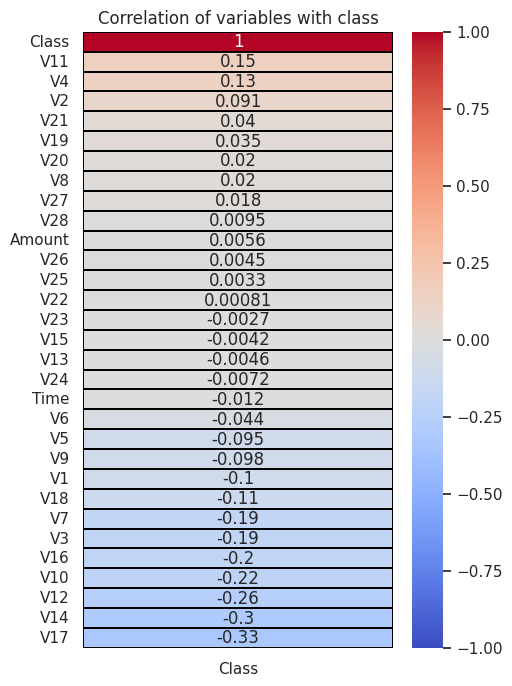

In [98]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['Class'].sort_values(ascending=False).to_frame(),cmap='coolwarm',
            annot=True,vmin=-1,vmax=1,linewidths=0.3,linecolor='black')
plt.title('Correlation of variables with class')
plt.show()

### Correlation of Features with Target Class

**Key Observations:**
- Most features have a weak correlation (close to 0) with the target, indicating no strong linear relationship.
- Features with the highest **positive correlation** to fraud (`Class=1`) are:
  - **V11 (0.15)**
  - **V4 (0.13)**
  - **V2 (0.085)**
  - **V19 (0.034)**
  - Others (V8, V21, V27, V20, V28) have very small positive values.
- Features with the highest **negative correlation** are:
  - **V17 (-0.31)**
  - **V14 (-0.29)**
  - **V12 (-0.25)**
  - **V10 (-0.21)**
  - Other negatively correlated features include V3, V16, V7, V18, V1, V9, V5, V6, and Time, but their values are closer to zero.
- **Amount** and **Time** have almost no correlation with the class, indicating transaction amount and timing alone are not strong fraud predictors.

**Conclusion:**
- No single feature has a strong linear correlation with the target variable, meaning fraud detection will likely require using a combination of features and non-linear models.
- Features with higher positive or negative correlation (e.g., V11, V4, V17, V14) may be more informative and worth focusing on during feature selection and model interpretation.

**Note:**

- Positive correlation: Feature increases → chance of fraud increases
- Negative correlation: Feature increases → chance of fraud decreases

In [99]:
df['Hour']=(df['Time']/3600)%24

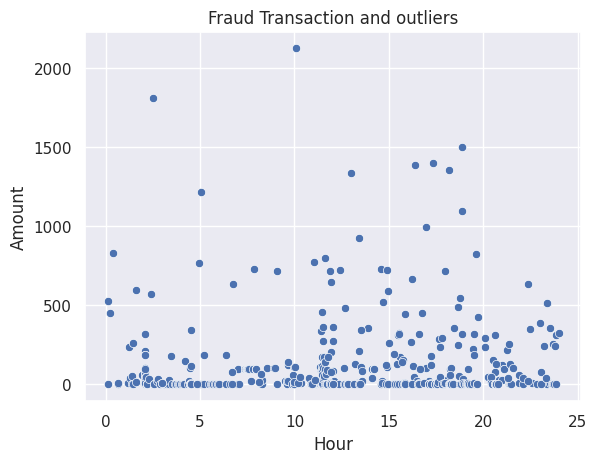

In [100]:
sns.scatterplot(x='Hour',y='Amount',data=df[df['Class']==1])
plt.title('Fraud Transaction and outliers')
plt.show()

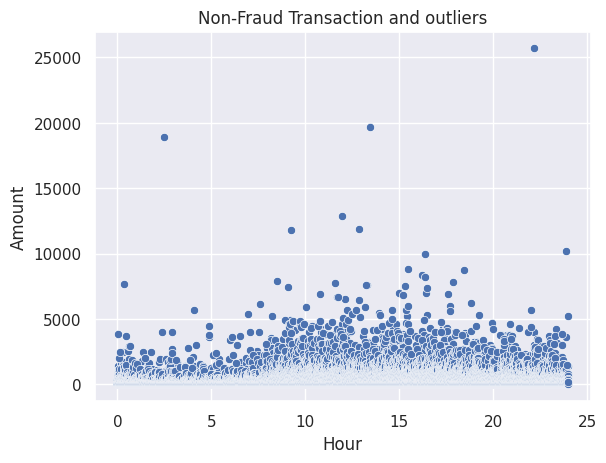

In [101]:
sns.scatterplot(x='Hour',y='Amount',data=df[df['Class']==0])
plt.title('Non-Fraud Transaction and outliers')
plt.show()

In [102]:
df=df.drop('Hour',axis=1)

### Fraud Transaction Amounts by Hour

**Key Observations:**
- **Fraudulent transactions occur throughout all hours of the day.**
- Most fraudulent transaction amounts are relatively low, clustered near the bottom of the plot.
- However, there are several **outlier transactions** with very high amounts (some exceeding \$2,000), scattered across different hours.
- No obvious peak hour for fraud is visible; high-value frauds can occur at any time.


###Statistical Analysis

In [103]:

iqr_value=iqr(df['Amount'])
lower_bound=np.quantile(df['Amount'],0.25)-1.5*iqr_value
upper_bound=np.quantile(df['Amount'],0.75)+1.5*iqr_value
# filter=(df['Amount']<lower_bound | df['Amount']>upper_bound)
filter = (df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)
print('Total Outlier',df[filter]['Amount'].count())
print('Fraud Outlier',df[filter & (df['Class']==1)]['Amount'].count())
print('Non-Fraud Outlier',df[filter & (df['Class']==0)]['Amount'].count())

Total Outlier 31904
Fraud Outlier 91
Non-Fraud Outlier 31813


In [104]:
Percentile=np.array([2.5,25.,50,75.,97.5])
cump_percentile=np.percentile(df['Amount'].values,Percentile)
print('Percentile',cump_percentile)

#Empirical Cumulative distibution function

Percentile [  0.76     5.6     22.      77.165  597.7985]


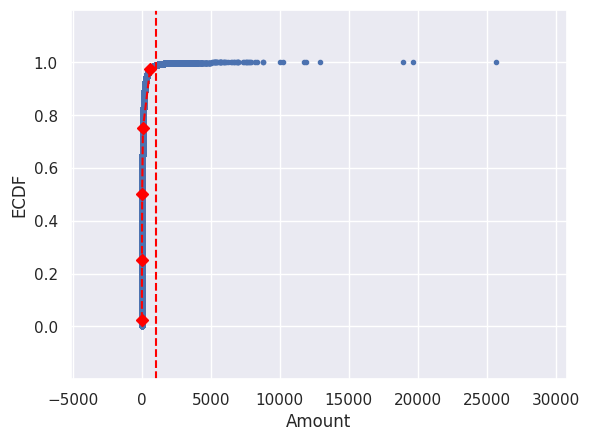

98.92% transaction less or equal to 1000 


In [105]:
x=np.sort(df['Amount'])
y=np.arange(1,len(x)+1)/len(x)

fig,ax=plt.subplots()
ax.plot(x,y,marker='.',linestyle='none')
ax.axvline(x=1000,color='red',linestyle='--')
ax.set_xlabel('Amount')
ax.set_ylabel('ECDF')
ax.plot(cump_percentile, Percentile/100 ,marker='D',color='red',linestyle='--')
ax.margins(0.2)
plt.show()

smaller_1000=df['Amount'][df['Amount']<1000].count() /df['Amount'].count()

print(f"{smaller_1000:0.2%} transaction less or equal to 1000 ")

### Empirical Cumulative Distribution Function (ECDF) of Transaction Amounts

**Description:**
- This plot shows the Empirical Cumulative Distribution Function (**ECDF**) for the transaction amounts in the dataset.
- The x-axis represents the **transaction amount**, while the y-axis shows the **ECDF value** (ranging from 0 to 1), which represents the proportion of transactions less than or equal to a given amount.
- Blue dots mark the ECDF values for individual data points.
- Red diamonds indicate quantiles or specific reference points on the ECDF curve.
- The red dashed vertical line at zero highlights the starting point for transaction amounts.

**Key Observations:**
- The ECDF rises very steeply at low amounts, indicating that the vast majority of transactions are for small amounts.
- The curve quickly approaches 1, meaning that nearly all transactions have relatively low amounts.
- There are a few outlier points (amounts much greater than the majority), visible as isolated dots far to the right.
- The red diamonds visually reinforce how quickly the cumulative proportion increases with small increments in amount, and the dashed line at zero emphasizes that there are no negative transaction amounts.

**Conclusion:**
- The ECDF confirms that most transaction amounts are small, with only a tiny fraction representing large outliers.
- This steep rise and long right tail are typical for financial transaction data, suggesting a highly skewed distribution.

# **Preprocessing**

In [106]:
#Drop the dublicate Value
df=df.drop_duplicates()

In [107]:
#All fraud and 5000 non-fraud data
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0].sample(n=5000, random_state=42)
df=pd.concat([fraud,non_fraud])

In [108]:
#Saperating the dependent and independent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [109]:
#Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print('Size of X_train',X_train.shape)
print('Size of X_test',X_test.shape)
print('Size of y_train',y_train.shape)
print('Size of y_test',y_test.shape)

print('Number of fraud in the train dataset before SMOTE',y_train[y_train==1].count())
print('Number of non-fraud in the train dataset before SMOTE',y_train[y_train==0].count())
print('Number of fraud in the test dataset',y_test[y_test==1].count())
print('Number of non-fraud in the test dataset',y_test[y_test==0].count())

Size of X_train (3831, 30)
Size of X_test (1642, 30)
Size of y_train (3831,)
Size of y_test (1642,)
Number of fraud in the train dataset before SMOTE 304
Number of non-fraud in the train dataset before SMOTE 3527
Number of fraud in the test dataset 169
Number of non-fraud in the test dataset 1473


In [110]:
#Normalised the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [111]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_train,y_train)


In [112]:
print('The shape of the X_train data after SMOTE',X_res.shape)
print('The shape of the y_train data after SMOTE',y_res.shape)

print('Number of fraud data_point in train dataset',y_res[y_res==1].count())
print('Number of non-fraud data_point in train dataset',y_res[y_res==0].count())



The shape of the X_train data after SMOTE (7054, 30)
The shape of the y_train data after SMOTE (7054,)
Number of fraud data_point in train dataset 3527
Number of non-fraud data_point in train dataset 3527


#**Model Building and Evaluations**

**Logistic Regression**

In [113]:
lr=LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_res,y_res)
y_pred=lr.predict(X_test)

In [114]:
print('Classification report:\n',classification_report(y_test,y_pred))
print('Accuracy_score:',accuracy_score(y_test,y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1473
           1       0.81      0.88      0.84       169

    accuracy                           0.97      1642
   macro avg       0.90      0.93      0.91      1642
weighted avg       0.97      0.97      0.97      1642

Accuracy_score: 0.9665042630937881


In [115]:
def plot_confusion_matrix(cm):
  cm=cm[::-1]
  cm=pd.DataFrame(cm,columns=['pre0','pre1'],index=['true 1','true 0'])
  fig=ff.create_annotated_heatmap(z=cm.values,x=list(cm.columns),y=list(cm.index),colorscale='plasma',showscale=True,reversescale=True)
  fig.update_layout(width=400,height=400,title='Confusion matrix',font_size=16)
  fig.show()

In [116]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred))

In [117]:
#Hyperparameter Tuning
param_grid={
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100]
}
grid_lr=GridSearchCV(lr,param_grid,cv=5,scoring='f1')
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [118]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [119]:
lr=LogisticRegression(solver='liblinear',C=0.1,penalty='l1',random_state=42)
lr.fit(X_res,y_res)
y_pred_grid=lr.predict(X_test)

In [120]:
print('Classification Report:\n',classification_report(y_test,y_pred_grid))
print('Accuracy Score',accuracy_score(y_test,y_pred_grid))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1473
           1       0.83      0.89      0.86       169

    accuracy                           0.97      1642
   macro avg       0.91      0.93      0.92      1642
weighted avg       0.97      0.97      0.97      1642

Accuracy Score 0.9695493300852619


In [121]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred_grid))

**Random Forest**

In [122]:
#Random Forest Classifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_res,y_res)
y_pred_rf=rfc.predict(X_test)


In [123]:
print('Classification Report:\n',classification_report(y_test,y_pred_rf))
print('Accuracy Score',accuracy_score(y_test,y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1473
           1       0.99      0.86      0.92       169

    accuracy                           0.98      1642
   macro avg       0.99      0.93      0.95      1642
weighted avg       0.98      0.98      0.98      1642

Accuracy Score 0.9841656516443362


In [124]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred_rf))

In [125]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30,None],
    'min_samples_split':[2,5,10],
    'class_weight':['balanced',{0:1,1:10}]
}
rfc_grid=GridSearchCV(estimator=rfc,
                      param_grid=param_grid,
                      cv=5,
                      n_jobs=1,
                      scoring='f1'
                      )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 10}],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [126]:
rfc_grid.best_params_

{'class_weight': {0: 1, 1: 10},
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [127]:
rfc=RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    class_weight={0:1,1:10},
    random_state=42
)
rfc.fit(X_res,y_res)
y_pred_rfc=rfc.predict(X_test)

In [128]:
print('Classification Report:\n',classification_report(y_test,y_pred_rfc))
print('Accuracy Score',accuracy_score(y_test,y_pred_rfc))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1473
           1       0.85      0.89      0.87       169

    accuracy                           0.97      1642
   macro avg       0.92      0.94      0.93      1642
weighted avg       0.97      0.97      0.97      1642

Accuracy Score 0.9732034104750305


In [129]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred_rfc))

**Deep Learning**

In [130]:
#Set the seed

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(24,input_shape=(30,),activation='sigmoid'),

    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_res,y_res,epochs=15,batch_size=32,validation_data=(X_test,y_test))

score=model.evaluate(X_test,y_test)

print('Loss:',score[0])
print('Accuracy:',score[1])

y_pred_dp=model.predict(X_test)
y_pred_class=(y_pred_dp>0.5).astype('int32')





Epoch 1/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7643 - loss: 0.5762 - val_accuracy: 0.9762 - val_loss: 0.2518
Epoch 2/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.2387 - val_accuracy: 0.9659 - val_loss: 0.1484
Epoch 3/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9473 - loss: 0.1520 - val_accuracy: 0.9616 - val_loss: 0.1307
Epoch 4/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1294 - val_accuracy: 0.9647 - val_loss: 0.1255
Epoch 5/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1203 - val_accuracy: 0.9610 - val_loss: 0.1232
Epoch 6/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.1155 - val_accuracy: 0.9604 - val_loss: 0.1217
Epoch 7/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1123 - val_accuracy: 0.9592 - val_loss: 0.1201
Epoch 8/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1096 - val_accuracy: 0.

In [131]:
print('Classification Report:\n',classification_report(y_test, y_pred_class))
print('Accuracy:',accuracy_score(y_test, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1473
           1       0.78      0.90      0.84       169

    accuracy                           0.96      1642
   macro avg       0.89      0.94      0.91      1642
weighted avg       0.97      0.96      0.97      1642

Accuracy: 0.964068209500609


In [132]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred_class))

**Use of Autoencoder**

In [133]:
input_dim=X_train.shape[1]
encoding_dim=64
#Encoder
input_layer=Input(shape=(input_dim,))
encoder_1=Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder_2=Dense(int(encoding_dim/2),activation='relu')(encoder_1)

encoder_3=Dense(int(encoding_dim/4),activation='relu')(encoder_2)


#decoder

decoder_3=Dense(int(encoding_dim/4),activation='relu')(encoder_3)

decoder_2=Dense(int(encoding_dim/2),activation='relu')(decoder_3)

decoder_1=Dense(encoding_dim,activation='relu')(decoder_2)


output_layer=Dense(input_dim,activation='sigmoid')(decoder_1)
autoencoder=Model(inputs=input_layer,outputs=output_layer)



In [134]:
# Assembling and Training Autoencoders
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
history=autoencoder.fit(
    X_train,X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.6247 - val_loss: 1.5398
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5136 - val_loss: 1.4197
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3897 - val_loss: 1.3198
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3000 - val_loss: 1.2623
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2466 - val_loss: 1.2231
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2048 - val_loss: 1.1882
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1698 - val_loss: 1.1574
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1390 - val_loss: 1.1298
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1113 - val_loss: 1.1047
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0863 - val_loss: 1.0818
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0636 - val_loss: 1.0609
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [135]:
latent_model = Sequential()
latent_model.add(autoencoder.layers[0])
latent_model.add(autoencoder.layers[1])
latent_model.add(autoencoder.layers[2])
latent_model.add(autoencoder.layers[3])
latent_model.add(autoencoder.layers[4])


In [136]:
X_train_encoded=latent_model.predict(X_train)
X_test_encoded=latent_model.predict(X_test)

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [137]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(3831, 16)
(1642, 16)


In [138]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(24,activation='sigmoid',input_shape=(X_test_encoded.shape[1],)),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_2.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])





In [139]:
deep_history = model_2.fit(X_train_encoded, y_train,
                              epochs=100,
                              batch_size=256,
                              validation_data=(X_test_encoded, y_test),
                              verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3713 - loss: 0.7042 - val_accuracy: 0.8971 - val_loss: 0.5833
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.5444 - val_accuracy: 0.8971 - val_loss: 0.4730
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9162 - loss: 0.4385 - val_accuracy: 0.8971 - val_loss: 0.4061
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9162 - loss: 0.3734 - val_accuracy: 0.8971 - val_loss: 0.3677
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9162 - loss: 0.3349 - val_accuracy: 0.8971 - val_loss: 0.3460
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.3121 - val_accuracy: 0.8971 - val_loss: 0.3332
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.2981 - val_accuracy: 0.8971 - val_loss: 0.3250
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.2888 - val_accuracy: 0.8971 -

In [140]:
# Forecasting Using the Deep Learning Model
y_pred_encode = model_2.predict(X_test_encoded)
y_pred_2 = (y_pred_encode > 0.5).astype(int)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [141]:
print("Classification Report:\n", classification_report(y_test, y_pred_2))
print("Accuracy: ", accuracy_score(y_test, y_pred_2))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1473
           1       0.96      0.76      0.85       169

    accuracy                           0.97      1642
   macro avg       0.97      0.88      0.92      1642
weighted avg       0.97      0.97      0.97      1642

Accuracy:  0.9719853836784409


In [142]:
plot_confusion_matrix(cm=confusion_matrix(y_test,y_pred_2))

# 📊 Model Performance Summary and Discussion

This report summarizes and compares the performance of several machine learning models based on their classification reports.

---

## 🔍 Summary of Model Performances

| Model                           | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|--------------------------------|----------|----------------------|------------------|--------------------|
| Logistic Regression            | 0.9665   | 0.81                 | 0.88             | 0.84               |
| Logistic Regression (Grid)     | 0.9695   | 0.83                 | 0.89             | 0.86               |
| Random Forest                  | 0.9842   | 0.99                 | 0.86             | 0.92               |
| Random Forest (Grid)           | 0.9732   | 0.85                 | 0.89             | 0.87               |
| Feedforward Neural Network     | 0.9641   | 0.78                 | 0.90             | 0.84               |
| Autoencoder                    | 0.9720   | 0.96                 | 0.76             | 0.85               |

---

## 🧠 Discussion

### 🔹 Logistic Regression vs. Grid Search Optimization
- Grid search tuning improved **precision**, **recall**, and **F1-score** for class 1.
- Both models are strong on class 0, but struggle more with class 1, possibly due to class imbalance or model simplicity.

### 🔹 Random Forest Models
- **Untuned Random Forest** shows the **best overall accuracy (98.42%)** and the **highest F1-score for class 1 (0.92)**.
- **Grid-tuned Random Forest** performed slightly worse in class 1 metrics, possibly due to overfitting or suboptimal hyperparameters.

### 🔹 Feedforward Neural Network
- Strong **recall (0.90)** for class 1 means it detects most actual positives.
- **Lower precision (0.78)** suggests more false positives compared to other models.

### 🔹 Autoencoder
- Excellent **precision (0.96)** for class 1, but **low recall (0.76)**.
- Might be more suitable for **anomaly detection** where precision is more important than recall.

---

## 🏁 Conclusion & Recommendations

- ✅ **Best Overall Model:** `Random Forest (untuned)` – strong across all metrics, especially class 1.
- 🎯 **Best Recall (Class 1):** `Feedforward Neural Network` – best at capturing positives, but needs better precision.
- ⚖️ **Best Tuned Simplicity:** `Logistic Regression with Grid Search` – improved performance with interpretability.
- ⚠️ **Use Autoencoder** if your use case prioritizes **precision** over **recall**, such as fraud or anomaly detection.

---
